https://www.kaggle.com/datasets/humairmunir/anaemia-prediction-dataset/data?select=expanded_output.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("expanded_output.csv")

In [3]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.264176,30.838924,25.899587,6.297293,Yes
1,2,F,43.144832,30.171404,26.692997,8.608315,Yes
2,3,F,46.506491,27.430905,26.051133,9.713010,Yes
3,4,F,44.963982,30.519205,24.499161,4.809385,Yes
4,5,M,45.069466,31.089378,23.853518,8.995228,Yes


In [4]:
df.drop("Number", axis = 1, inplace = True)

In [5]:
df["Anaemic"] = df["Anaemic"].map({"Yes" : 1, "No" : 0})

In [6]:
df["Sex"].value_counts()

Sex
F     152
M     135
F     119
M      94
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_array = encoder.fit_transform(df[['Sex']])
encoded_array

array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [9]:
encoded_columns = encoder.get_feature_names_out(['Sex'])

In [10]:
encoded_columns

array(['Sex_F ', 'Sex_M', 'Sex_M '], dtype=object)

In [11]:
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

In [12]:
final_df = pd.concat([df, encoded_df], axis = 1)
final_df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_F,Sex_M,Sex_M
0,M,43.264176,30.838924,25.899587,6.297293,1,0.0,1.0,0.0
1,F,43.144832,30.171404,26.692997,8.608315,1,0.0,0.0,0.0
2,F,46.506491,27.430905,26.051133,9.713010,1,0.0,0.0,0.0
3,F,44.963982,30.519205,24.499161,4.809385,1,0.0,0.0,0.0
4,M,45.069466,31.089378,23.853518,8.995228,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
495,F,45.704839,27.557135,26.712476,13.615373,0,0.0,0.0,0.0
496,F,44.906272,30.375286,24.713653,11.594262,0,0.0,0.0,0.0
497,F,43.430623,29.777833,26.782023,12.407689,0,1.0,0.0,0.0
498,F,43.304680,29.805033,26.875941,12.102483,0,0.0,0.0,0.0


In [13]:
final_df.drop("Sex", axis = 1, inplace = True)

In [14]:
df = final_df.copy()

In [15]:
df

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_F,Sex_M,Sex_M
0,43.264176,30.838924,25.899587,6.297293,1,0.0,1.0,0.0
1,43.144832,30.171404,26.692997,8.608315,1,0.0,0.0,0.0
2,46.506491,27.430905,26.051133,9.713010,1,0.0,0.0,0.0
3,44.963982,30.519205,24.499161,4.809385,1,0.0,0.0,0.0
4,45.069466,31.089378,23.853518,8.995228,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
495,45.704839,27.557135,26.712476,13.615373,0,0.0,0.0,0.0
496,44.906272,30.375286,24.713653,11.594262,0,0.0,0.0,0.0
497,43.430623,29.777833,26.782023,12.407689,0,1.0,0.0,0.0
498,43.304680,29.805033,26.875941,12.102483,0,0.0,0.0,0.0


In [16]:
df["Anaemic"].value_counts()

Anaemic
1    250
0    250
Name: count, dtype: int64

In [17]:
X = df.drop("Anaemic", axis = 1)
y = df["Anaemic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<Axes: >

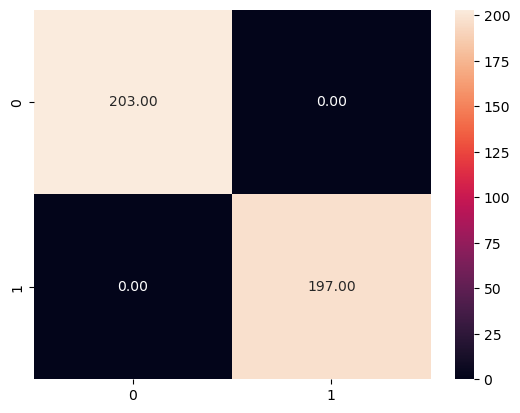

In [18]:
rfr = RandomForestClassifier()
rfr.fit(X_train, y_train)
y_preds = rfr.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_preds), annot = True, fmt = ".2f")

E:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<Axes: >

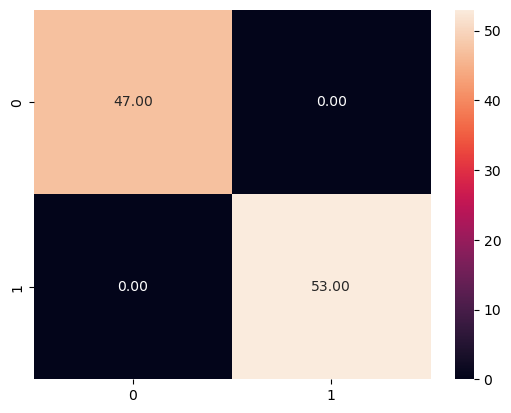

In [19]:
abc = AdaBoostClassifier(n_estimators = 200)
abc.fit(X_train, y_train)
y_preds = abc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, fmt = ".2f")